# Magnetic facies assignment

## Import scientific Python packages and define functions

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

from sklearn.cluster import KMeans
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
%config InlineBackend.figure_format='retina'

def make_cross_plot(axis,df,variable_1,variable_2,color_variable,x='linear',y='linear',legend_loc="upper right"):
    scatter = axis.scatter(df[variable_1],df[variable_2],c=df[color_variable])
    axis.set_xlabel(variable_1)
    axis.set_ylabel(variable_2)

    facies1_marker = plt.scatter([], [], marker='o',c='#82CA9C',label='facies 1')
    facies2_marker = plt.scatter([], [], marker='o',c='#919396',label='facies 2')
    facies3_marker = plt.scatter([], [], marker='o',c='#F27179',label='facies 3')
    plt.legend(handles=[facies1_marker,facies2_marker,facies3_marker],loc=legend_loc)
    
    if y == 'log':
        axis.set_yscale('log')
    if x == 'log':
        axis.set_xscale('log')

## Import data

In [98]:
core_data = pd.read_excel('~/Dropbox/Manuscript_2_0/Data/NonesuchData.xlsx')
core_data.DrillCore.unique()

array(['Bear Creek Mining Co. WC-9', 'Bear Creek Mining Co. DO-8',
       'Bear Creek Mining Co. PC-1', 'Bear Creek Mining Co. WPB-4',
       'Devils Gate Outcrop', 'Potato River Falls Outcrop',
       'Presque Isle River Outcrop'], dtype=object)

In [99]:
core_data['color'] = pd.Series(dtype='str')

In [100]:
core_data.loc[core_data.FaciesInterp == 1.0, 'color'] = "#82CA9C"
core_data.loc[core_data.FaciesInterp == 2.0, 'color'] = "#919396"
core_data.loc[core_data.FaciesInterp == 3.0, 'color'] = "#F27179"

In [101]:
core_data = core_data[core_data['DrillCore']!='Bear Creek Mining Co. WPB-4']

In [102]:
WC9_core_data = core_data[core_data['DrillCore']=='Bear Creek Mining Co. WC-9']
DO8_core_data = core_data[core_data['DrillCore']=='Bear Creek Mining Co. DO-8']
PC1_core_data = core_data[core_data['DrillCore']=='Bear Creek Mining Co. PC-1']
DG18_data = core_data[core_data['DrillCore']=='Devils Gate Outcrop']
PRF18_data = core_data[core_data['DrillCore']=='Potato River Falls Outcrop']
PIR18_data = core_data[core_data['DrillCore']=='Presque Isle River Outcrop']

## WC9 data

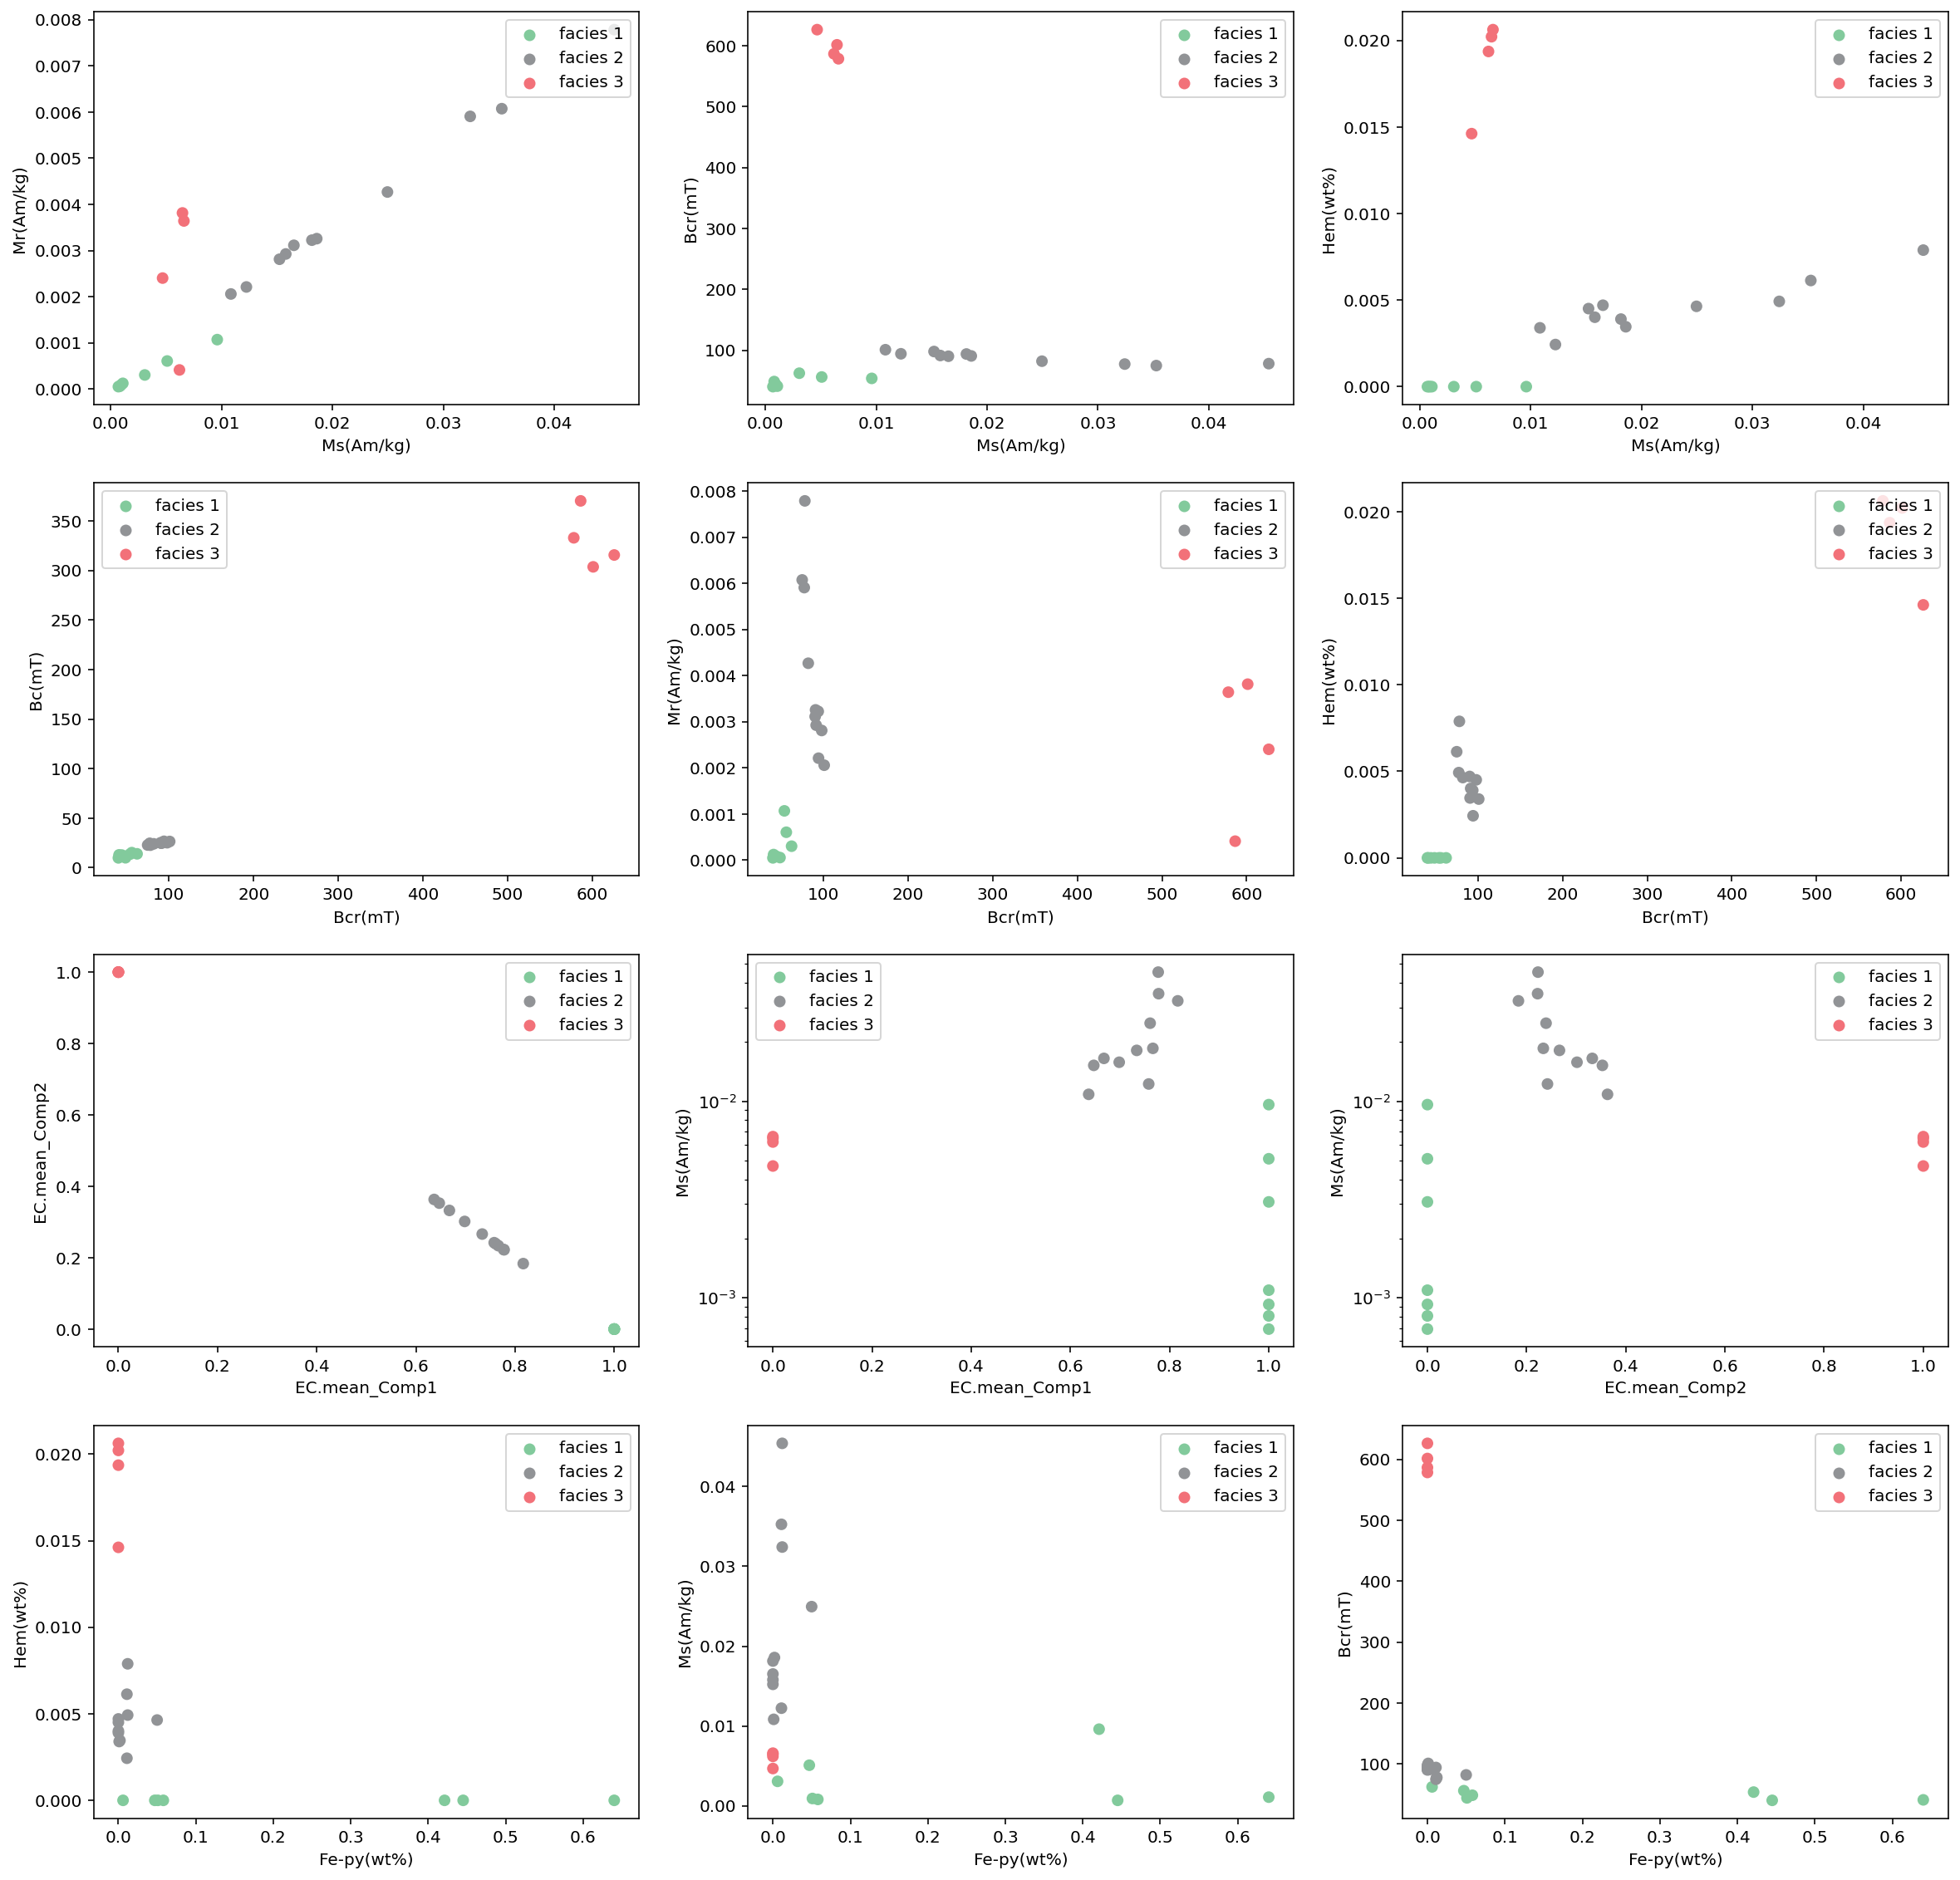

In [103]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(4,3,1)
make_cross_plot(ax1,WC9_core_data,'Ms(Am/kg)','Mr(Am/kg)','color')

ax2 = plt.subplot(4,3,2)
make_cross_plot(ax2,WC9_core_data,'Ms(Am/kg)','Bcr(mT)','color')

ax3 = plt.subplot(4,3,3)
make_cross_plot(ax3,WC9_core_data,'Ms(Am/kg)','Hem(wt%)','color')

ax4 = plt.subplot(4,3,4)
make_cross_plot(ax4,WC9_core_data,'Bcr(mT)','Bc(mT)','color',legend_loc="upper left")

ax5 = plt.subplot(4,3,5)
make_cross_plot(ax5,WC9_core_data,'Bcr(mT)','Mr(Am/kg)','color')

ax6 = plt.subplot(4,3,6)
make_cross_plot(ax6,WC9_core_data,'Bcr(mT)','Hem(wt%)','color')

ax7 = plt.subplot(4,3,7)
make_cross_plot(ax7,WC9_core_data,'EC.mean_Comp1','EC.mean_Comp2','color')

ax8 = plt.subplot(4,3,8)
make_cross_plot(ax8,WC9_core_data,'EC.mean_Comp1','Ms(Am/kg)','color',y='log',legend_loc="upper left")

ax9 = plt.subplot(4,3,9)
make_cross_plot(ax9,WC9_core_data,'EC.mean_Comp2','Ms(Am/kg)','color',y='log')

ax10 = plt.subplot(4,3,10)
make_cross_plot(ax10,WC9_core_data,'Fe-py(wt%)','Hem(wt%)','color')

ax11 = plt.subplot(4,3,11)
make_cross_plot(ax11,WC9_core_data,'Fe-py(wt%)','Ms(Am/kg)','color')

ax12 = plt.subplot(4,3,12)
make_cross_plot(ax12,WC9_core_data,'Fe-py(wt%)','Bcr(mT)','color')

plt.show()

## DO8 data

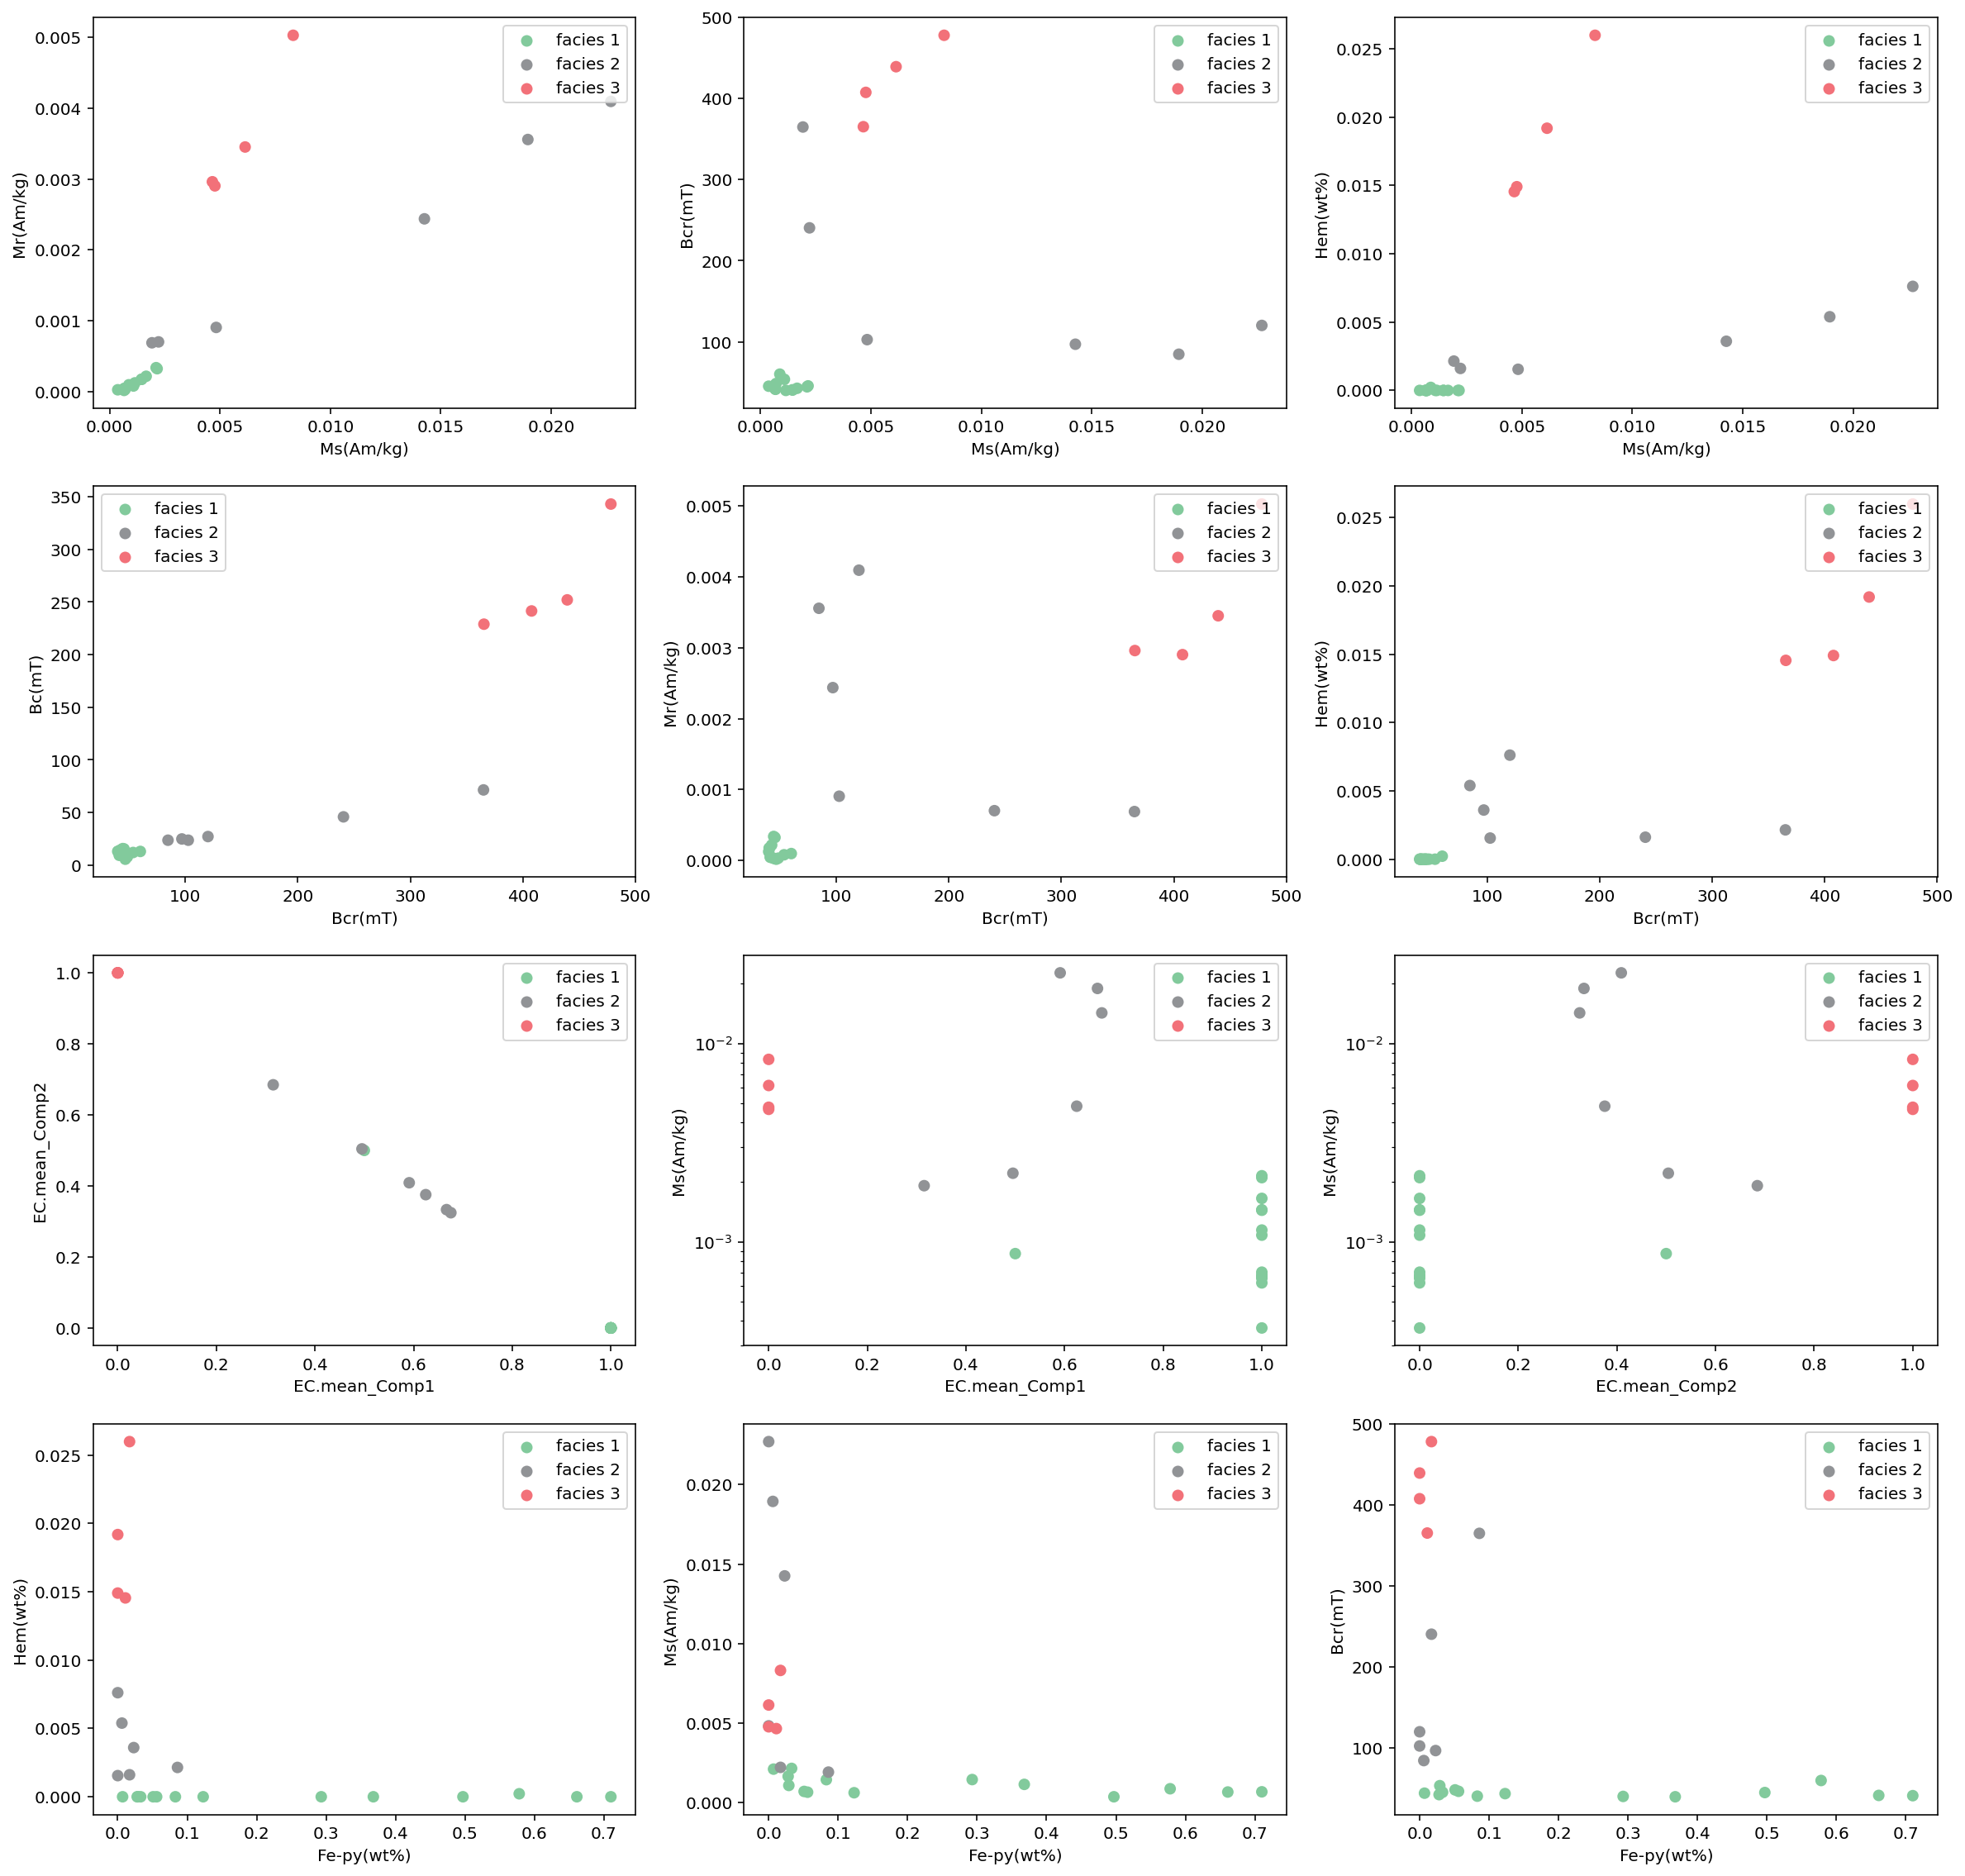

In [104]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(4,3,1)
make_cross_plot(ax1,DO8_core_data,'Ms(Am/kg)','Mr(Am/kg)','color')

ax2 = plt.subplot(4,3,2)
make_cross_plot(ax2,DO8_core_data,'Ms(Am/kg)','Bcr(mT)','color')

ax3 = plt.subplot(4,3,3)
make_cross_plot(ax3,DO8_core_data,'Ms(Am/kg)','Hem(wt%)','color')

ax4 = plt.subplot(4,3,4)
make_cross_plot(ax4,DO8_core_data,'Bcr(mT)','Bc(mT)','color',legend_loc="upper left")

ax5 = plt.subplot(4,3,5)
make_cross_plot(ax5,DO8_core_data,'Bcr(mT)','Mr(Am/kg)','color')

ax6 = plt.subplot(4,3,6)
make_cross_plot(ax6,DO8_core_data,'Bcr(mT)','Hem(wt%)','color')

ax7 = plt.subplot(4,3,7)
make_cross_plot(ax7,DO8_core_data,'EC.mean_Comp1','EC.mean_Comp2','color')

ax8 = plt.subplot(4,3,8)
make_cross_plot(ax8,DO8_core_data,'EC.mean_Comp1','Ms(Am/kg)','color',y='log')

ax9 = plt.subplot(4,3,9)
make_cross_plot(ax9,DO8_core_data,'EC.mean_Comp2','Ms(Am/kg)','color',y='log')

ax10 = plt.subplot(4,3,10)
make_cross_plot(ax10,DO8_core_data,'Fe-py(wt%)','Hem(wt%)','color')

ax11 = plt.subplot(4,3,11)
make_cross_plot(ax11,DO8_core_data,'Fe-py(wt%)','Ms(Am/kg)','color')

ax12 = plt.subplot(4,3,12)
make_cross_plot(ax12,DO8_core_data,'Fe-py(wt%)','Bcr(mT)','color')

plt.show()

## PC1 data

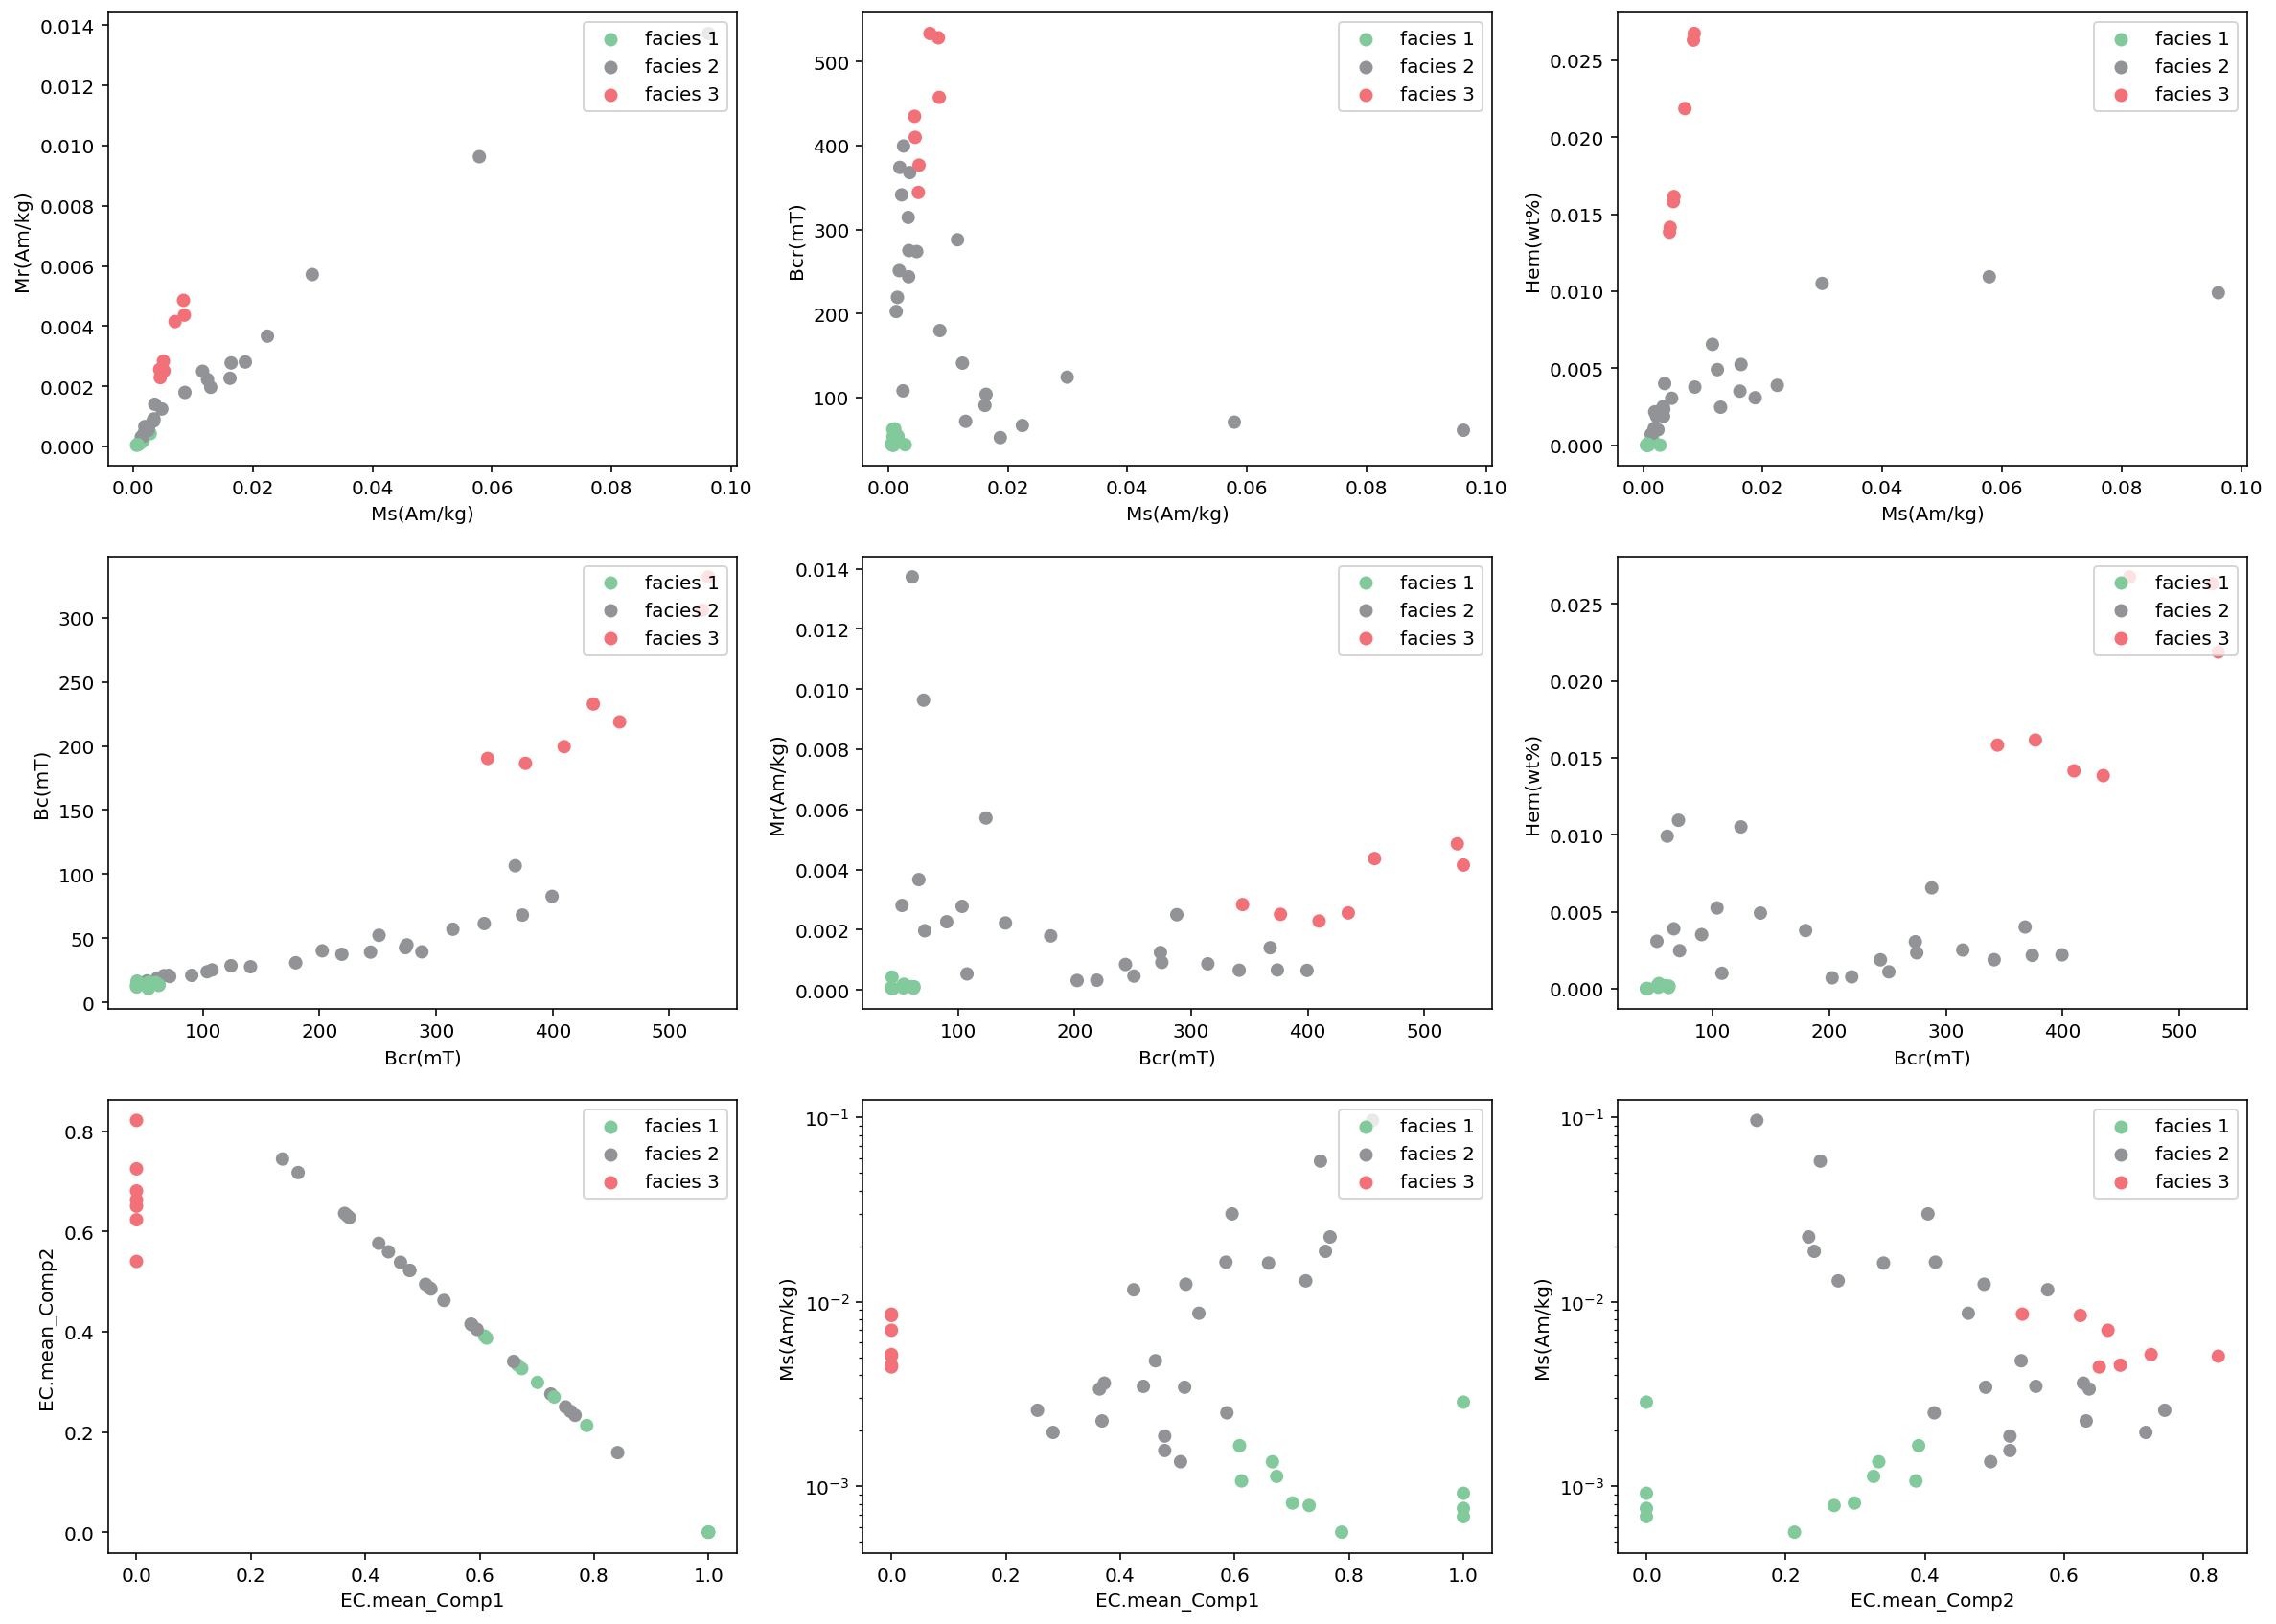

In [105]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(4,3,1)
make_cross_plot(ax1,PC1_core_data,'Ms(Am/kg)','Mr(Am/kg)','color')

ax2 = plt.subplot(4,3,2)
make_cross_plot(ax2,PC1_core_data,'Ms(Am/kg)','Bcr(mT)','color')

ax3 = plt.subplot(4,3,3)
make_cross_plot(ax3,PC1_core_data,'Ms(Am/kg)','Hem(wt%)','color')

ax4 = plt.subplot(4,3,4)
make_cross_plot(ax4,PC1_core_data,'Bcr(mT)','Bc(mT)','color')

ax5 = plt.subplot(4,3,5)
make_cross_plot(ax5,PC1_core_data,'Bcr(mT)','Mr(Am/kg)','color')

ax6 = plt.subplot(4,3,6)
make_cross_plot(ax6,PC1_core_data,'Bcr(mT)','Hem(wt%)','color')

ax7 = plt.subplot(4,3,7)
make_cross_plot(ax7,PC1_core_data,'EC.mean_Comp1','EC.mean_Comp2','color')

ax8 = plt.subplot(4,3,8)
make_cross_plot(ax8,PC1_core_data,'EC.mean_Comp1','Ms(Am/kg)','color',y='log')

ax9 = plt.subplot(4,3,9)
make_cross_plot(ax9,PC1_core_data,'EC.mean_Comp2','Ms(Am/kg)','color',y='log')

plt.show()

## Devil's Gate data

In [106]:
DG18_data_f1 = DG18_data[(DG18_data['Bcr(mT)']<100) & (DG18_data['Ms(Am/kg)']<0.01)]
DG18_data_f1

,DrillCore,SampleIdentifier,Depth(ft),Strat(m),Lithology,Microfossil Samp,MunsellScale,MunsellColorDescription,R,G,B,Ms(Am/kg),Mr(Am/kg),Bc(mT),Bcr(mT),Xhf(m3/kg),EC.mean_Comp1,EC.mean_Comp2,EC.mean_Comp3,EC.mean_Comp4,EC.mean_Comp1+4,Mag(wt%),MagUB(wt%),Hem(wt%),EC.sd_Comp2,EC.sd_Comp3,HemLB(wt%),HemUB(wt%),PowderPrep,Fe-carb(wt%),Fe-ox(wt%),Fe-mag(wt%),Fe-py(wt%),FeT(wt%),FeHR/FeT,Fe-py/FeHR,FeT/Al,Al(wt%),Cr(ppm),Cu(ppm),Mo(ppm),P(ppm),Rb(ppm),Ti(wt%),U(ppm),V(ppm),Zr(ppm),FaciesInterp,color
137,Devils Gate Outcrop,DG18-14.8a,NaN,14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002839,0.000462,16.9641,46.1132,1.030990e-07,1.0,NaN,NaN,NaN,1.0,0.000031,0.000177,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,#82CA9C
148,Devils Gate Outcrop,DG18-28.0a,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007355,0.001230,17.3306,44.9838,1.364230e-07,1.0,NaN,NaN,NaN,1.0,0.000080,0.000460,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,#82CA9C
149,Devils Gate Outcrop,DG18-28.6a,NaN,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001987,0.000256,15.0209,47.8686,1.075490e-07,1.0,NaN,NaN,NaN,1.0,0.000022,0.000124,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,#82CA9C


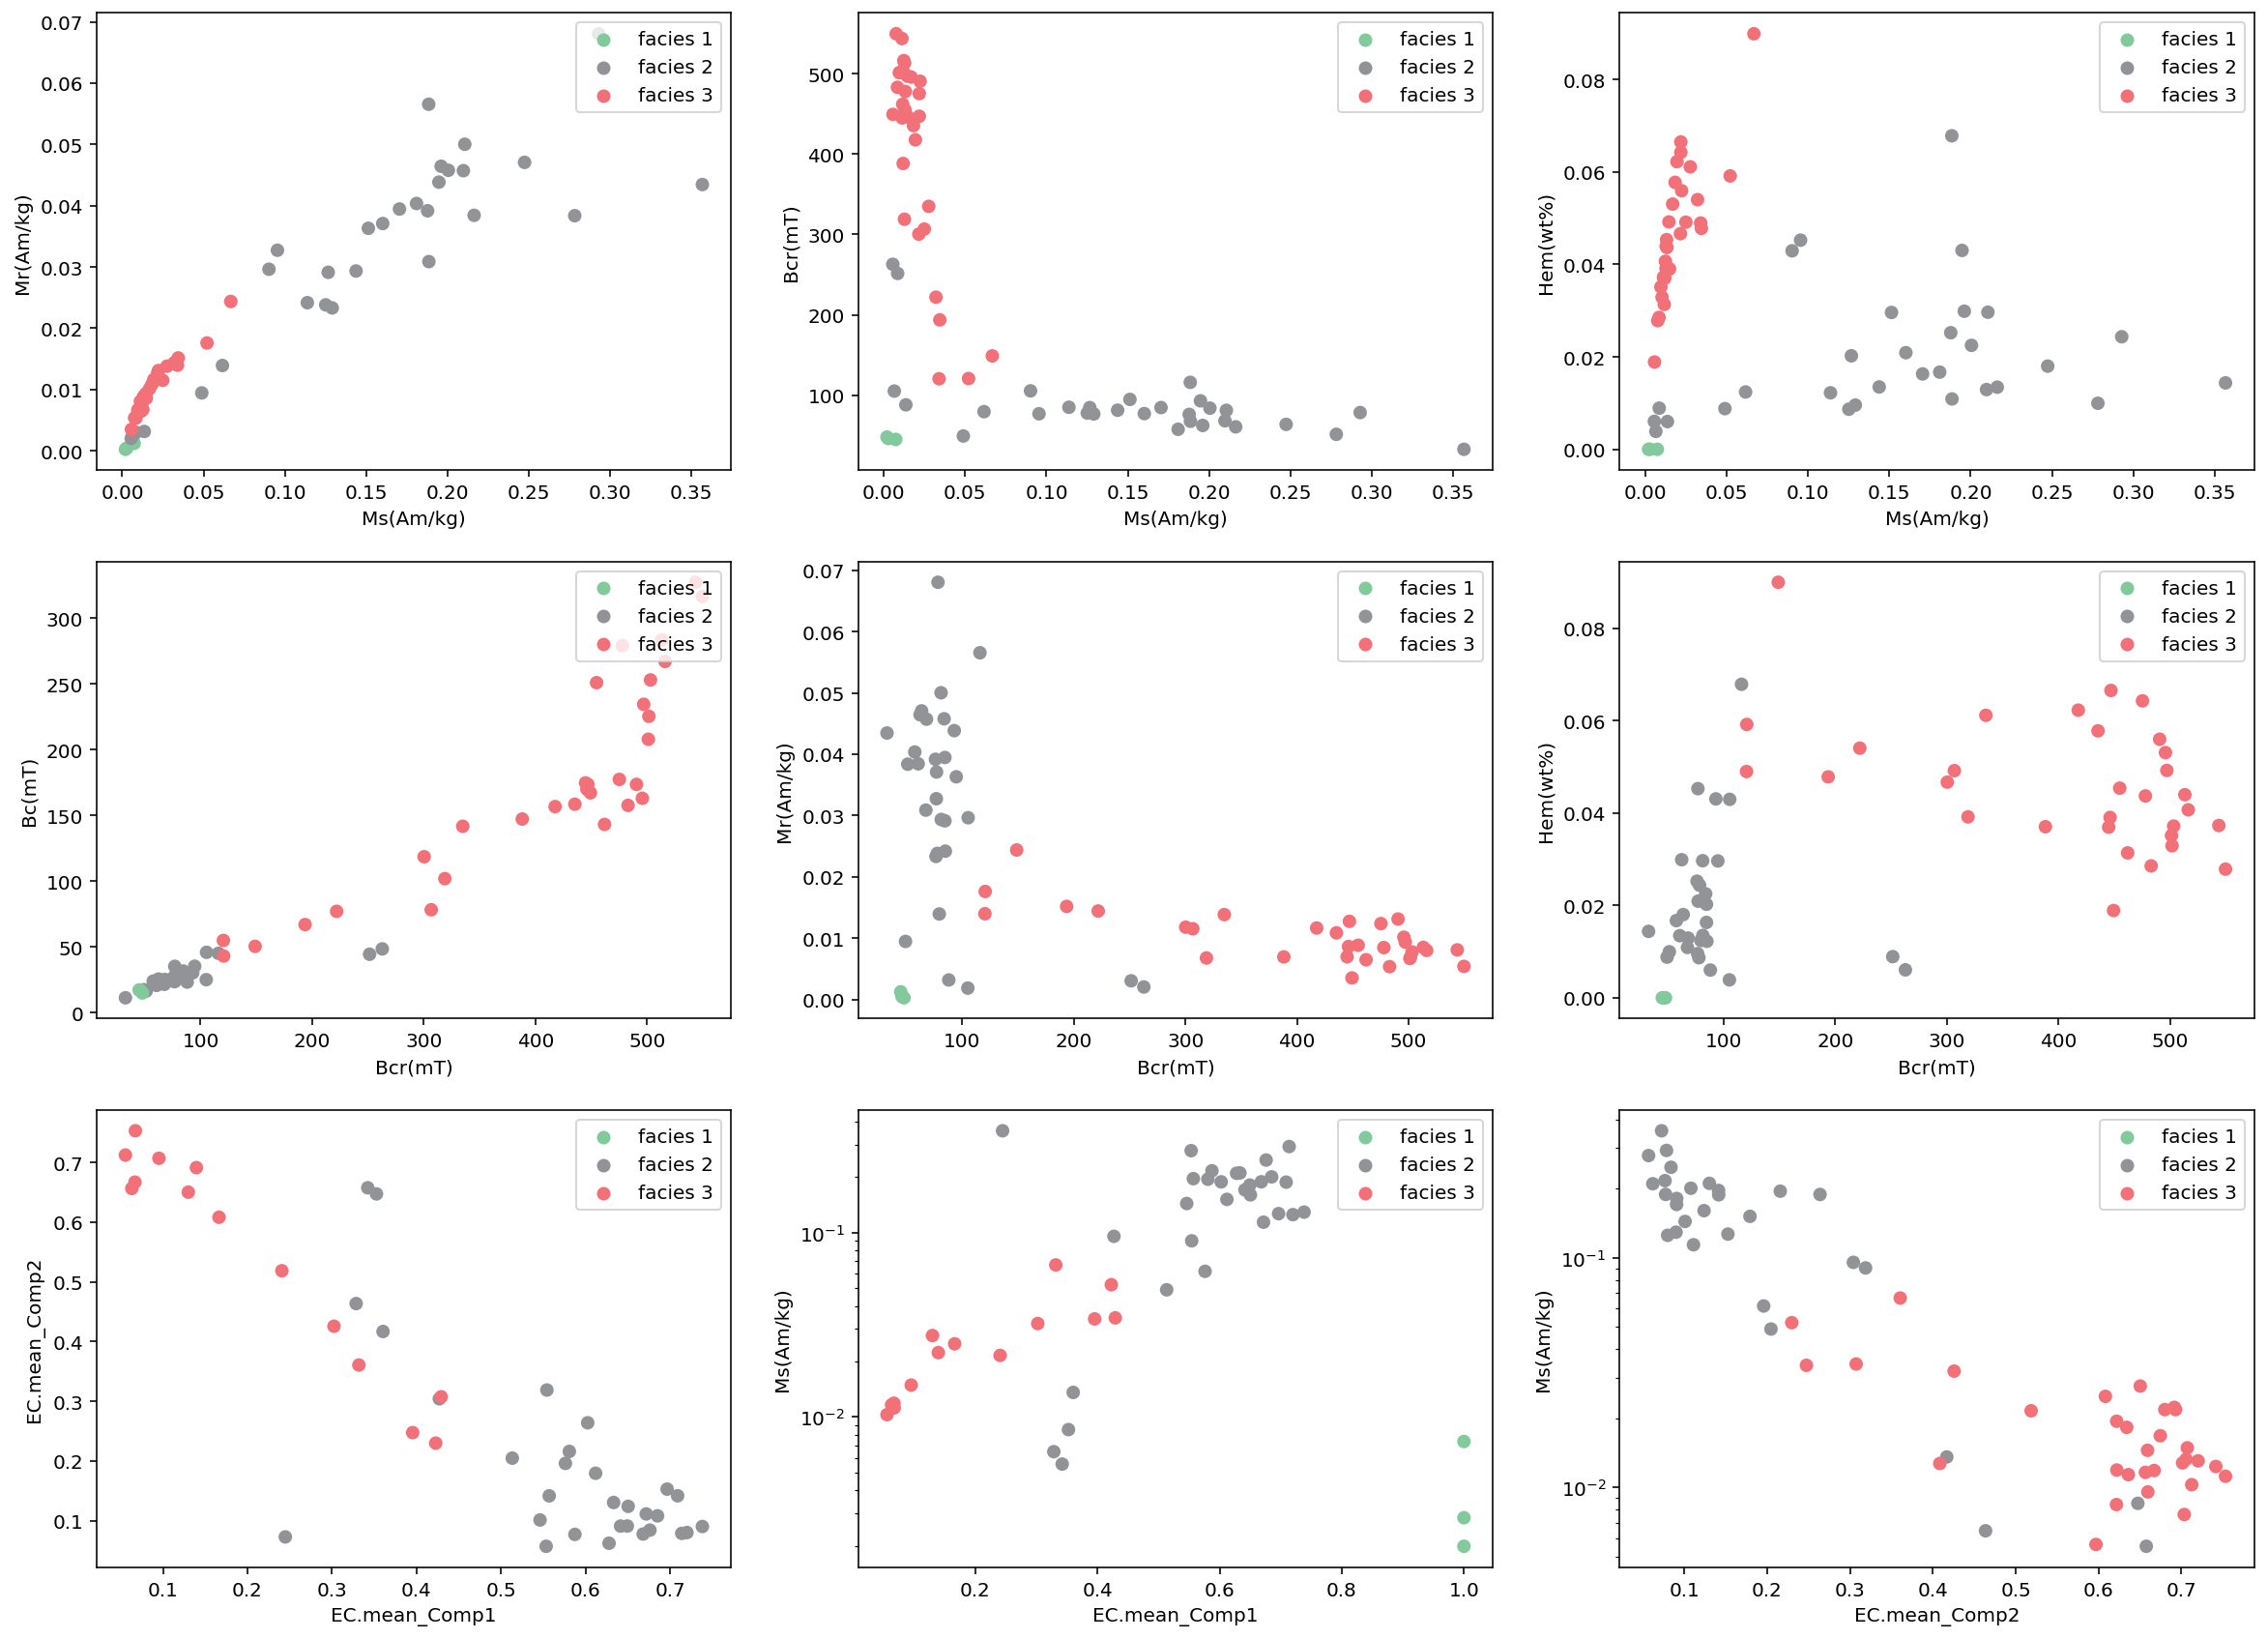

In [107]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(4,3,1)
make_cross_plot(ax1,DG18_data,'Ms(Am/kg)','Mr(Am/kg)','color')

ax2 = plt.subplot(4,3,2)
make_cross_plot(ax2,DG18_data,'Ms(Am/kg)','Bcr(mT)','color')

ax3 = plt.subplot(4,3,3)
make_cross_plot(ax3,DG18_data,'Ms(Am/kg)','Hem(wt%)','color')

ax4 = plt.subplot(4,3,4)
make_cross_plot(ax4,DG18_data,'Bcr(mT)','Bc(mT)','color')

ax5 = plt.subplot(4,3,5)
make_cross_plot(ax5,DG18_data,'Bcr(mT)','Mr(Am/kg)','color')

ax6 = plt.subplot(4,3,6)
make_cross_plot(ax6,DG18_data,'Bcr(mT)','Hem(wt%)','color')

ax7 = plt.subplot(4,3,7)
make_cross_plot(ax7,DG18_data,'EC.mean_Comp1','EC.mean_Comp2','color')

ax8 = plt.subplot(4,3,8)
make_cross_plot(ax8,DG18_data,'EC.mean_Comp1','Ms(Am/kg)','color',y='log')

ax9 = plt.subplot(4,3,9)
make_cross_plot(ax9,DG18_data,'EC.mean_Comp2','Ms(Am/kg)','color',y='log')

plt.show()

## Potato River Falls data

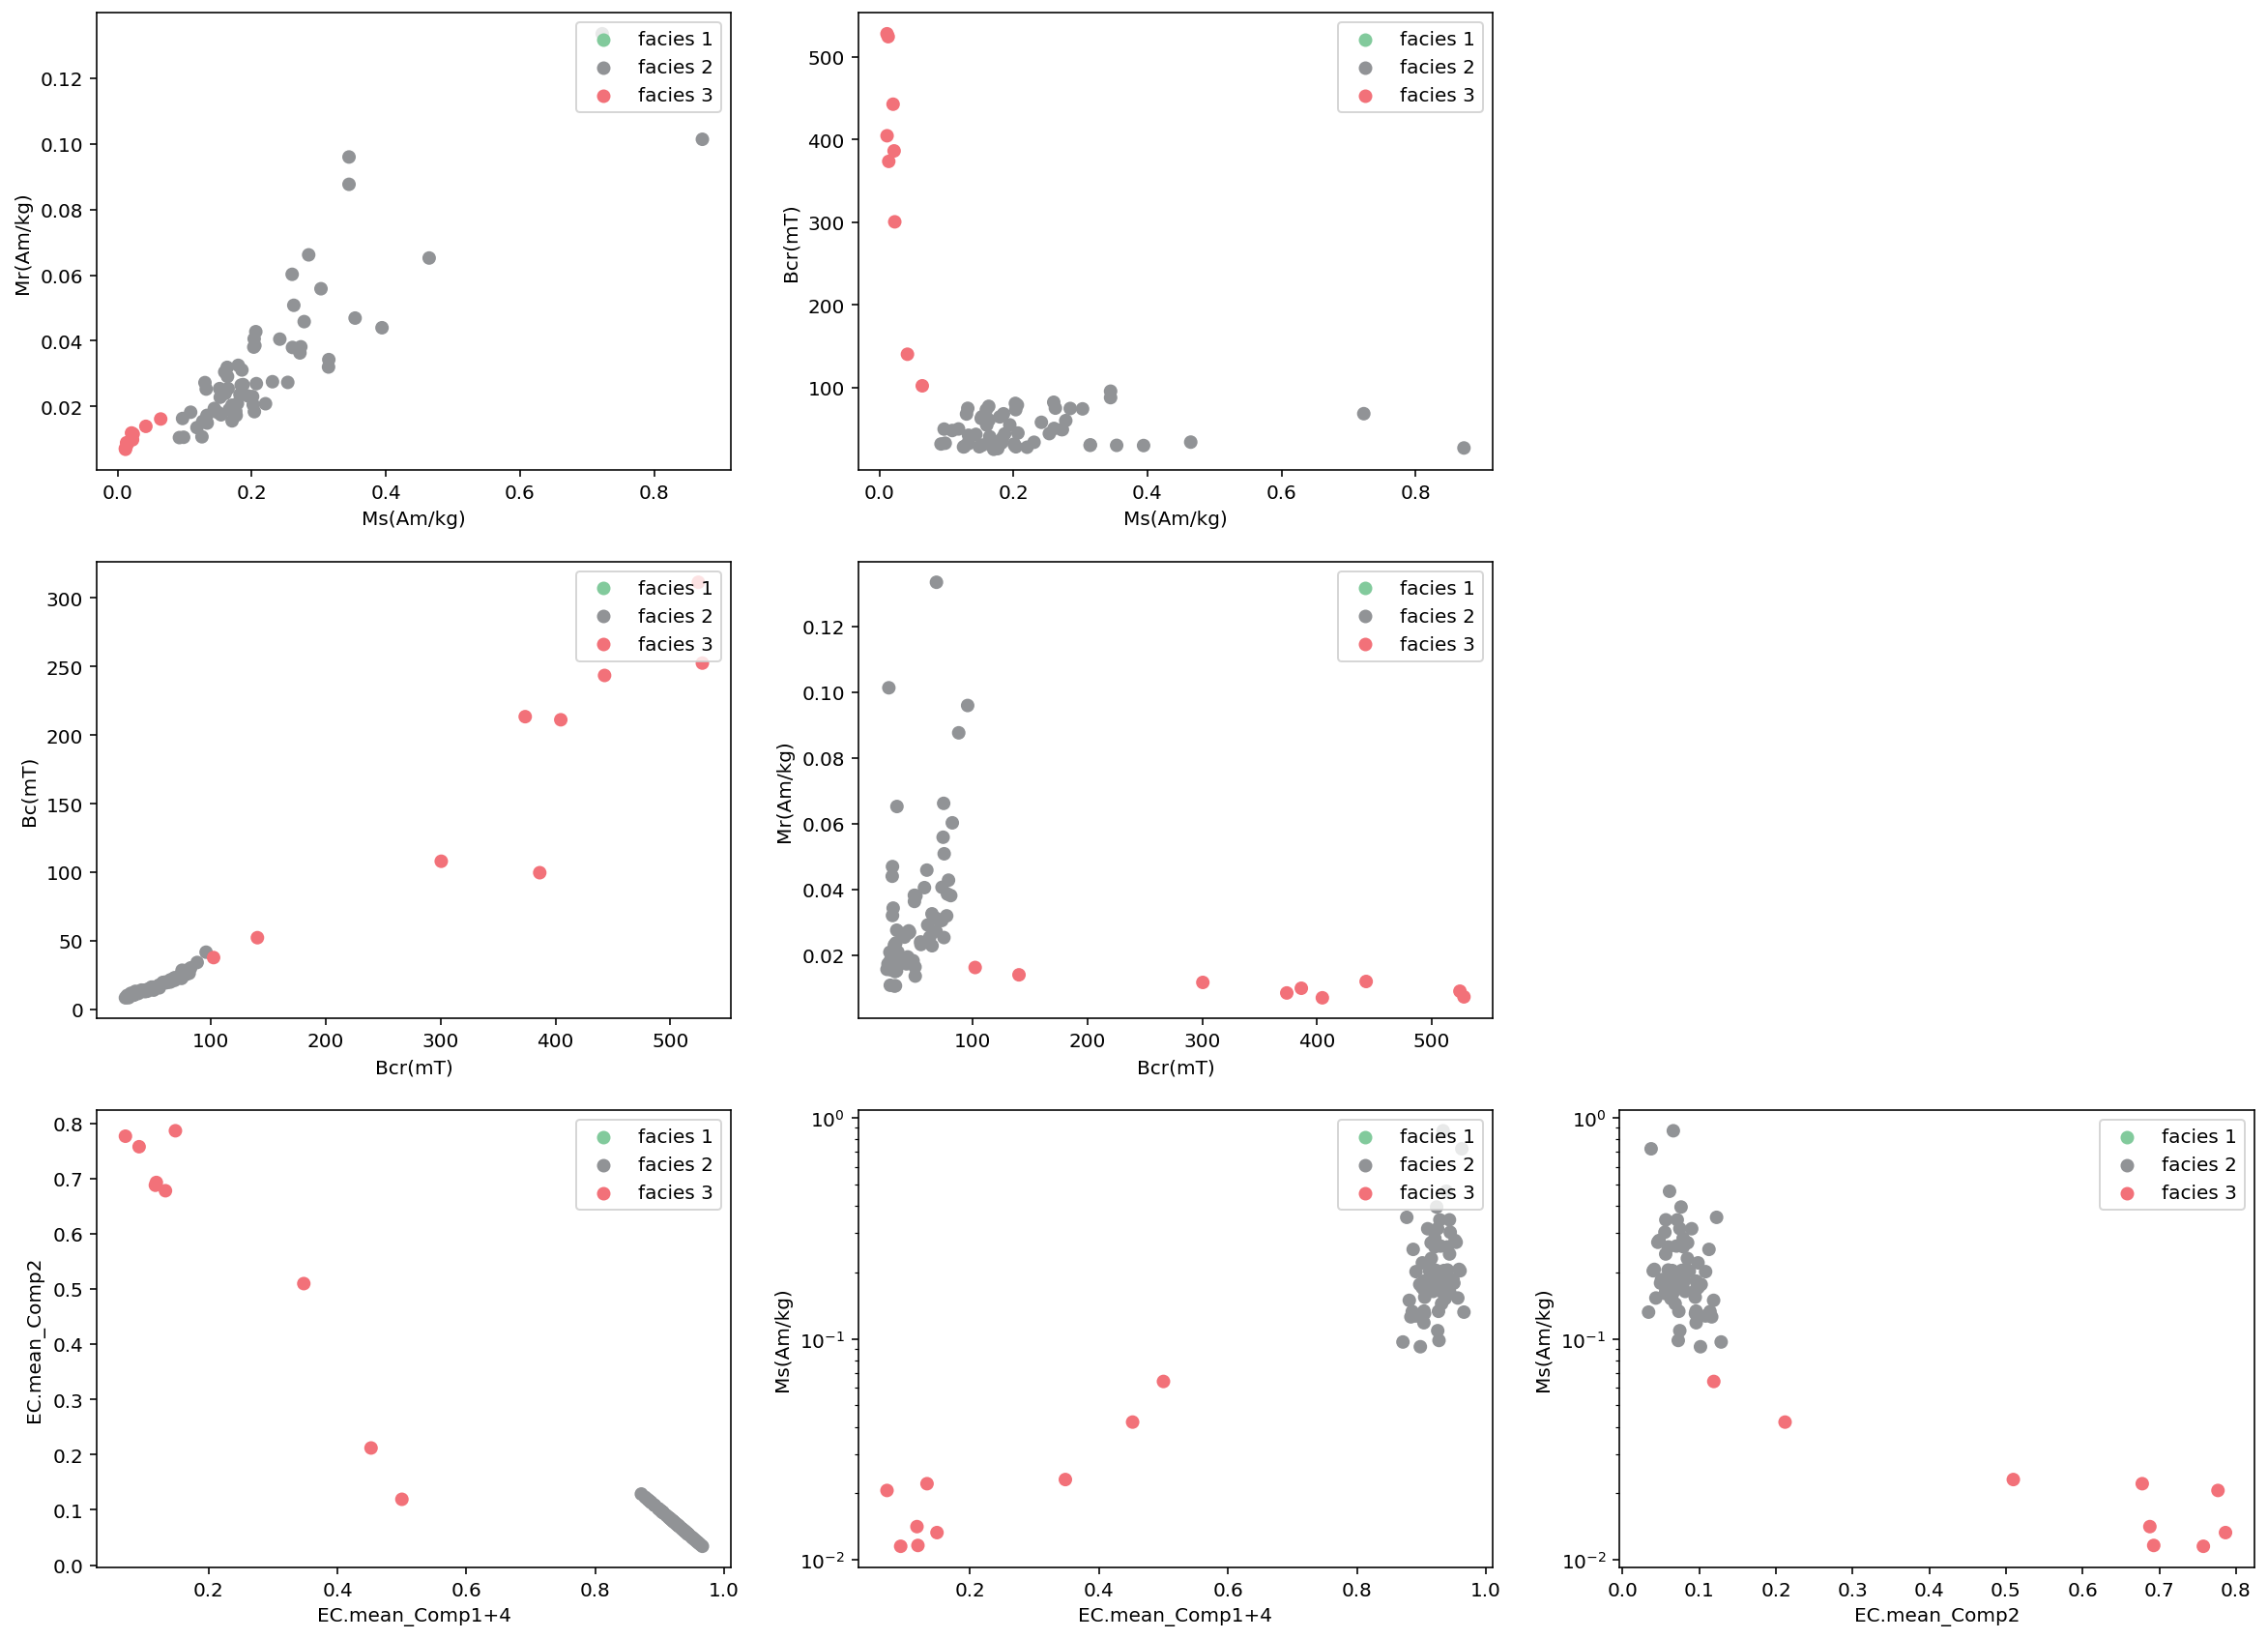

In [67]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(4,3,1)
make_cross_plot(ax1,PRF18_data,'Ms(Am/kg)','Mr(Am/kg)','color')

ax2 = plt.subplot(4,3,2)
make_cross_plot(ax2,PRF18_data,'Ms(Am/kg)','Bcr(mT)','color')

# ax3 = plt.subplot(4,3,3)
# make_cross_plot(ax3,PRF18_data,'Ms(Am/kg)','Hem(wt%)','color')

ax4 = plt.subplot(4,3,4)
make_cross_plot(ax4,PRF18_data,'Bcr(mT)','Bc(mT)','color')

ax5 = plt.subplot(4,3,5)
make_cross_plot(ax5,PRF18_data,'Bcr(mT)','Mr(Am/kg)','color')

# ax6 = plt.subplot(4,3,6)
# make_cross_plot(ax6,PRF18_data,'Bcr(mT)','Hem(wt%)','color')

ax7 = plt.subplot(4,3,7)
make_cross_plot(ax7,PRF18_data,'EC.mean_Comp1+4','EC.mean_Comp2','color')

ax8 = plt.subplot(4,3,8)
make_cross_plot(ax8,PRF18_data,'EC.mean_Comp1+4','Ms(Am/kg)','color',y='log')

ax9 = plt.subplot(4,3,9)
make_cross_plot(ax9,PRF18_data,'EC.mean_Comp2','Ms(Am/kg)','color',y='log')

plt.show()

## Presque Isle River outcrop

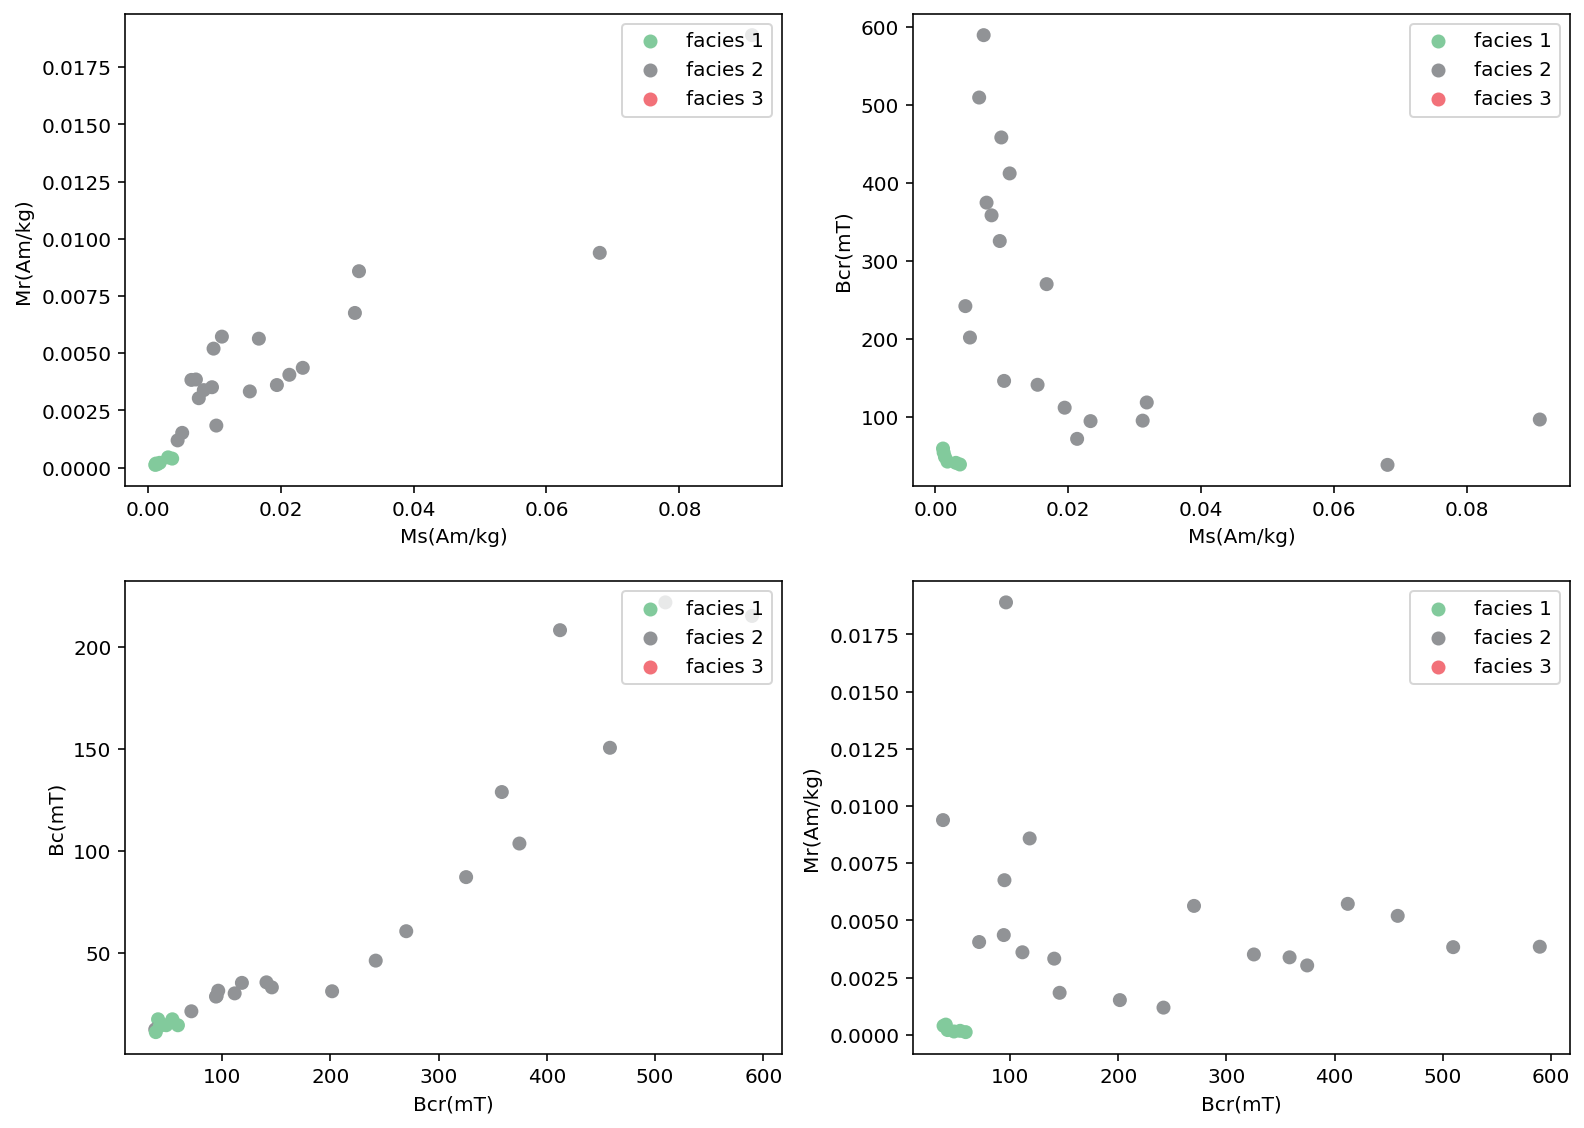

In [166]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(4,3,1)
make_cross_plot(ax1,PIR18_data,'Ms(Am/kg)','Mr(Am/kg)','color')

ax2 = plt.subplot(4,3,2)
make_cross_plot(ax2,PIR18_data,'Ms(Am/kg)','Bcr(mT)','color')

# ax3 = plt.subplot(4,3,3)
# make_cross_plot(ax3,PIR18_data,'Ms(Am/kg)','Hem(wt%)','color')

ax4 = plt.subplot(4,3,4)
make_cross_plot(ax4,PIR18_data,'Bcr(mT)','Bc(mT)','color')

ax5 = plt.subplot(4,3,5)
make_cross_plot(ax5,PIR18_data,'Bcr(mT)','Mr(Am/kg)','color')

# ax6 = plt.subplot(4,3,6)
# make_cross_plot(ax6,PIR18_data,'Bcr(mT)','Hem(wt%)','color')

# ax7 = plt.subplot(4,3,7)
# make_cross_plot(ax7,PIR18_data,'EC.mean_Comp1','EC.mean_Comp2','color')

# ax8 = plt.subplot(4,3,8)
# make_cross_plot(ax8,PIR18_data,'EC.mean_Comp1','Ms(Am/kg)','color',y='log')

# ax9 = plt.subplot(4,3,9)
# make_cross_plot(ax9,PIR18_data,'EC.mean_Comp2','Ms(Am/kg)','color',y='log')

plt.show()

In [64]:
PRF18_data_facies_3 = PRF18_data[(PRF18_data['Bcr(mT)']>200)]
PRF18_data_facies_3

,DrillCore,SampleIdentifier,Depth(ft),Strat(m),Lithology,Microfossil Samp,MunsellScale,MunsellColorDescription,R,G,B,Ms(Am/kg),Mr(Am/kg),Bc(mT),Bcr(mT),Xhf(m3/kg),EC.mean_Comp1,EC.mean_Comp2,EC.mean_Comp3,Mag(wt%),Hem(wt%),HemLB(wt%),HemUB(wt%),PowderPrep,Fe-carb(wt%),Fe-ox(wt%),Fe-mag(wt%),Fe-py(wt%),FeT(wt%),FeHR/FeT,Fe-py/FeHR,FeT/Al,Al(wt%),Cr(ppm),Cu(ppm),Mo(ppm),P(ppm),Rb(ppm),Ti(wt%),U(ppm),V(ppm),Zr(ppm),FaciesInterp
198,Potato River Falls Outcrop,PF18-1.e,NaN,105.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023106,0.011655,107.9870,300.495,9.531190e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
225,Potato River Falls Outcrop,PF18-160.e,NaN,157.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020624,0.011944,243.4380,442.787,1.086180e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
226,Potato River Falls Outcrop,PF18-162.e,NaN,158.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013303,0.008988,311.3640,524.480,8.627140e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
227,Potato River Falls Outcrop,PF18-163.e,NaN,159.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011535,0.007262,252.4460,527.990,6.474100e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
246,Potato River Falls Outcrop,PF18-72.e,NaN,114.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022129,0.009881,99.6457,386.306,7.959220e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
247,Potato River Falls Outcrop,PF18-73.e,NaN,115.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011637,0.006977,211.1310,404.628,6.501970e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
248,Potato River Falls Outcrop,PF18-75.e,NaN,116.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014157,0.008451,213.3960,373.630,7.484900e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


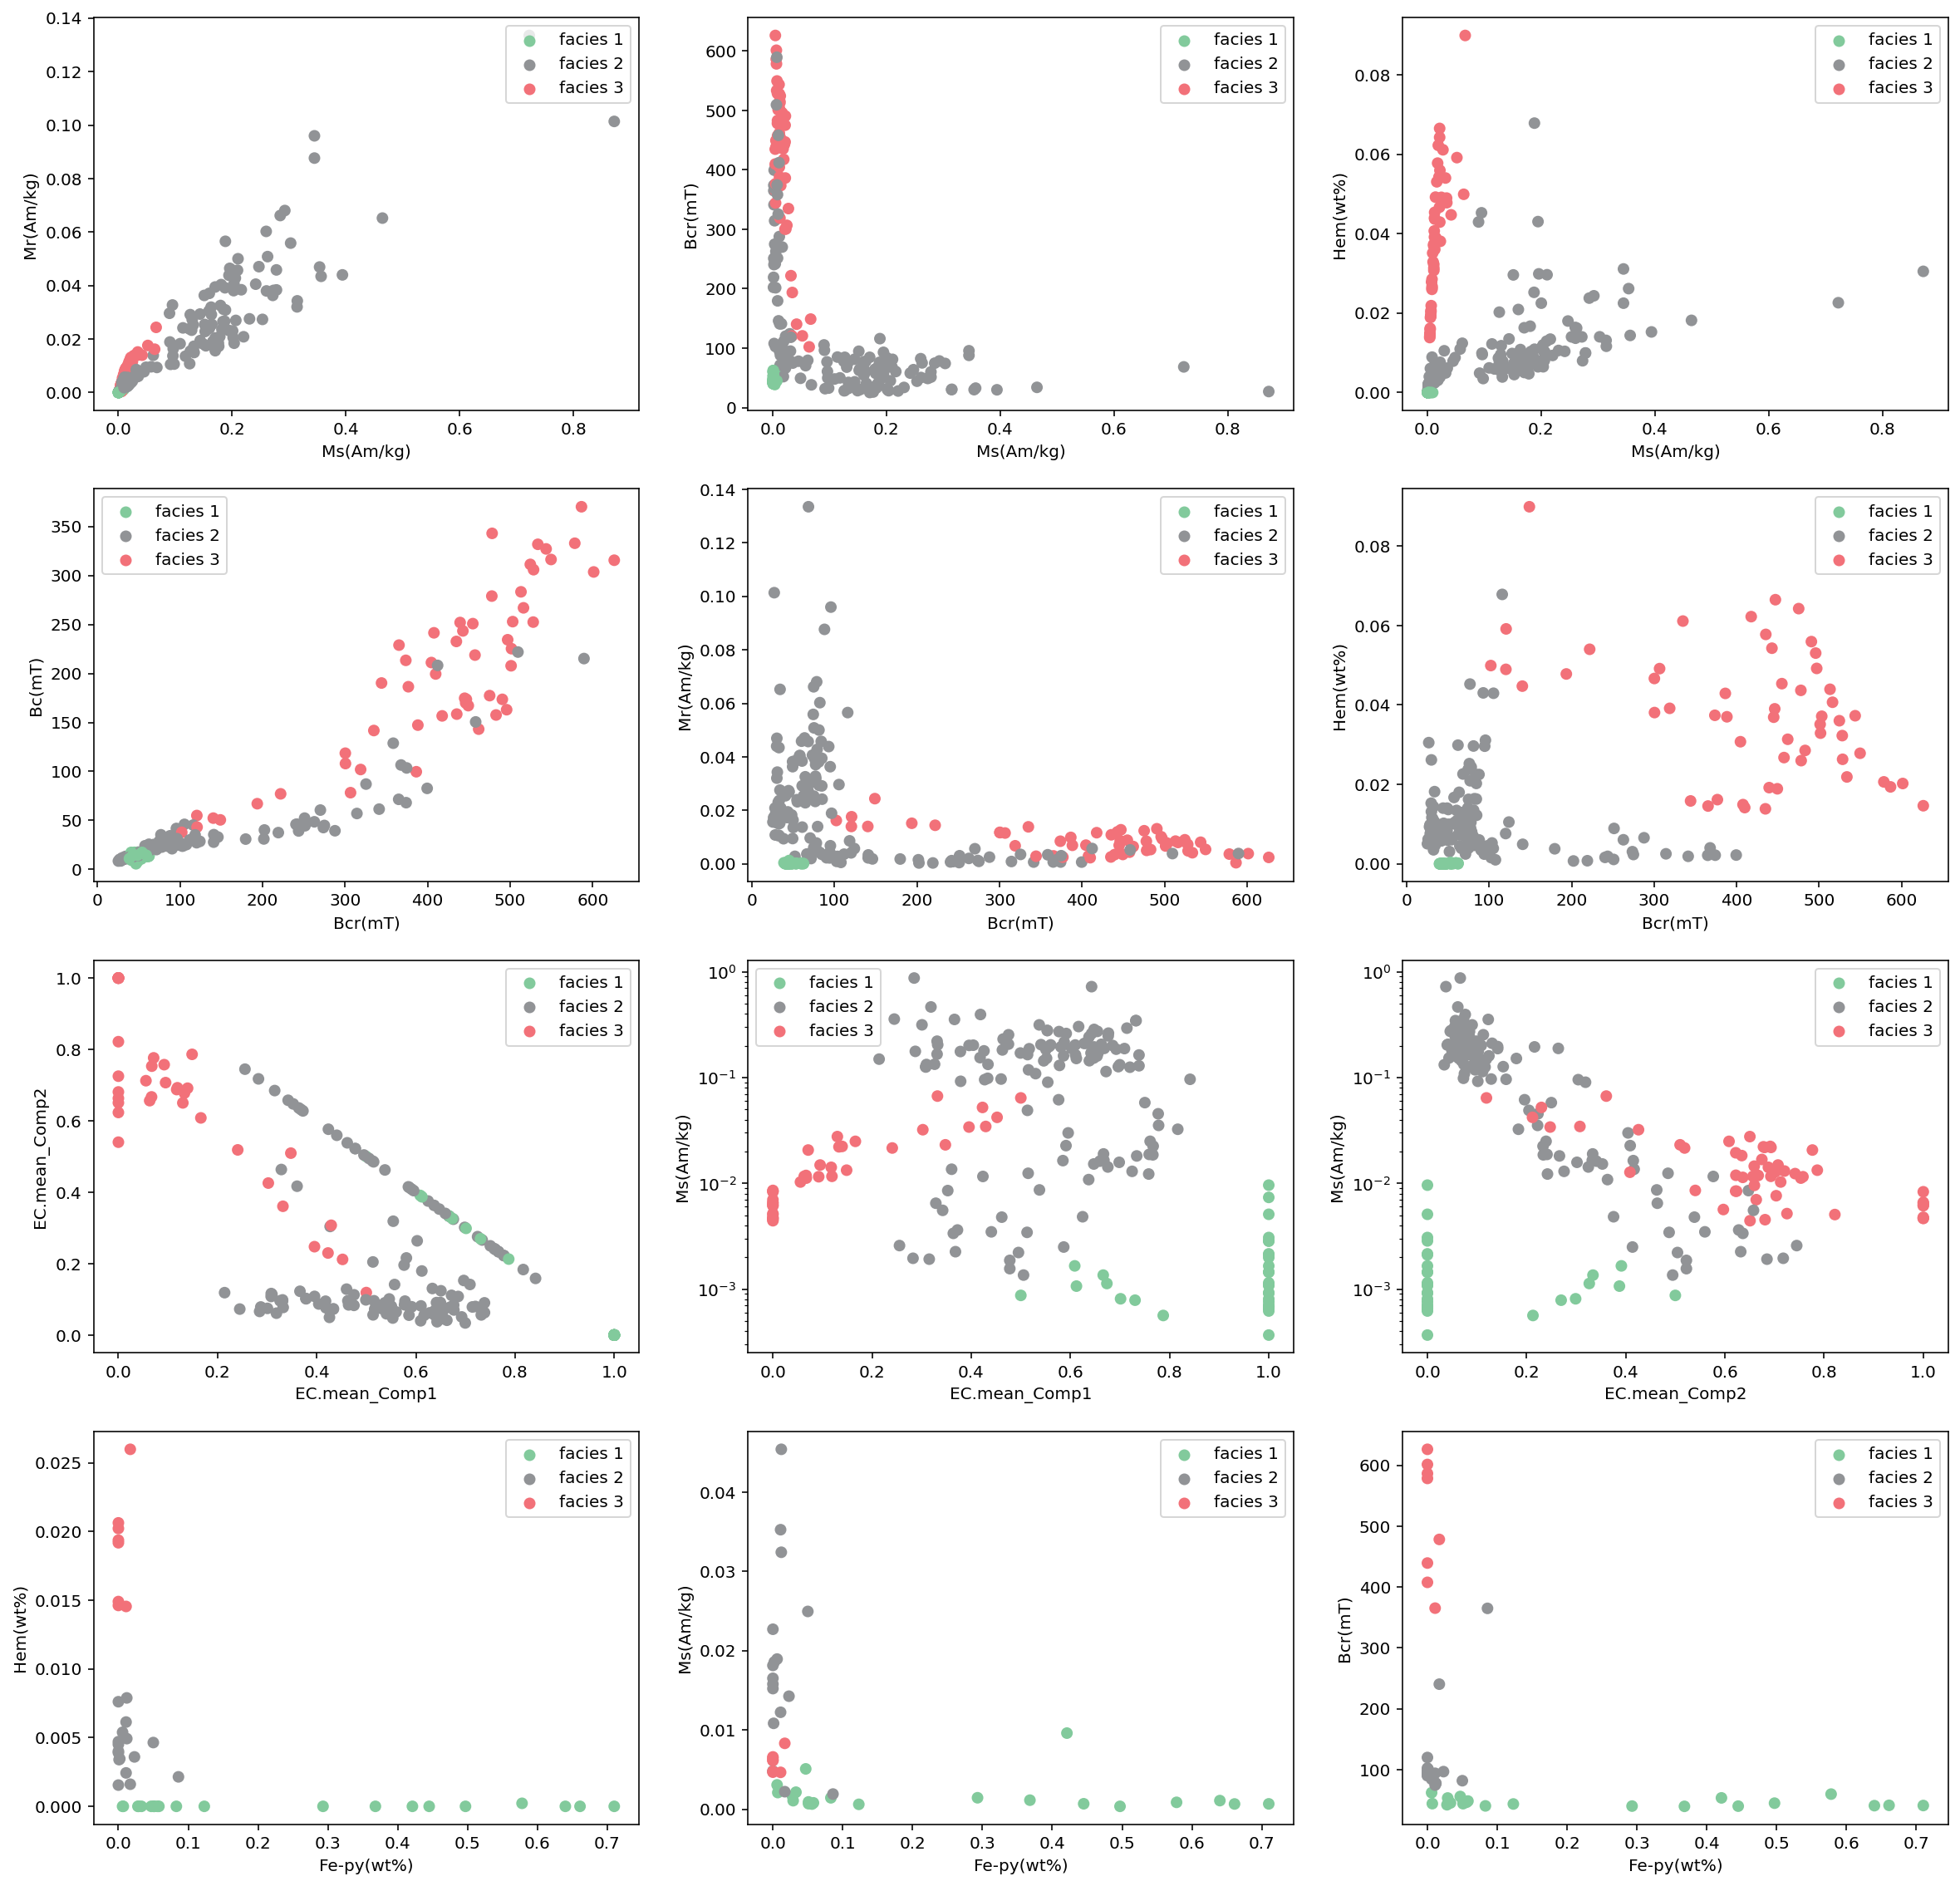

In [80]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(4,3,1)
make_cross_plot(ax1,core_data,'Ms(Am/kg)','Mr(Am/kg)','color')

ax2 = plt.subplot(4,3,2)
make_cross_plot(ax2,core_data,'Ms(Am/kg)','Bcr(mT)','color')

ax3 = plt.subplot(4,3,3)
make_cross_plot(ax3,core_data,'Ms(Am/kg)','Hem(wt%)','color')

ax4 = plt.subplot(4,3,4)
make_cross_plot(ax4,core_data,'Bcr(mT)','Bc(mT)','color',legend_loc="upper left")

ax5 = plt.subplot(4,3,5)
make_cross_plot(ax5,core_data,'Bcr(mT)','Mr(Am/kg)','color')

ax6 = plt.subplot(4,3,6)
make_cross_plot(ax6,core_data,'Bcr(mT)','Hem(wt%)','color')

ax7 = plt.subplot(4,3,7)
make_cross_plot(ax7,core_data,'EC.mean_Comp1','EC.mean_Comp2','color')

ax8 = plt.subplot(4,3,8)
make_cross_plot(ax8,core_data,'EC.mean_Comp1','Ms(Am/kg)','color',y='log',legend_loc="upper left")

ax9 = plt.subplot(4,3,9)
make_cross_plot(ax9,core_data,'EC.mean_Comp2','Ms(Am/kg)','color',y='log')

ax10 = plt.subplot(4,3,10)
make_cross_plot(ax10,core_data,'Fe-py(wt%)','Hem(wt%)','color')

ax11 = plt.subplot(4,3,11)
make_cross_plot(ax11,core_data,'Fe-py(wt%)','Ms(Am/kg)','color')

ax12 = plt.subplot(4,3,12)
make_cross_plot(ax12,core_data,'Fe-py(wt%)','Bcr(mT)','color')

plt.show()

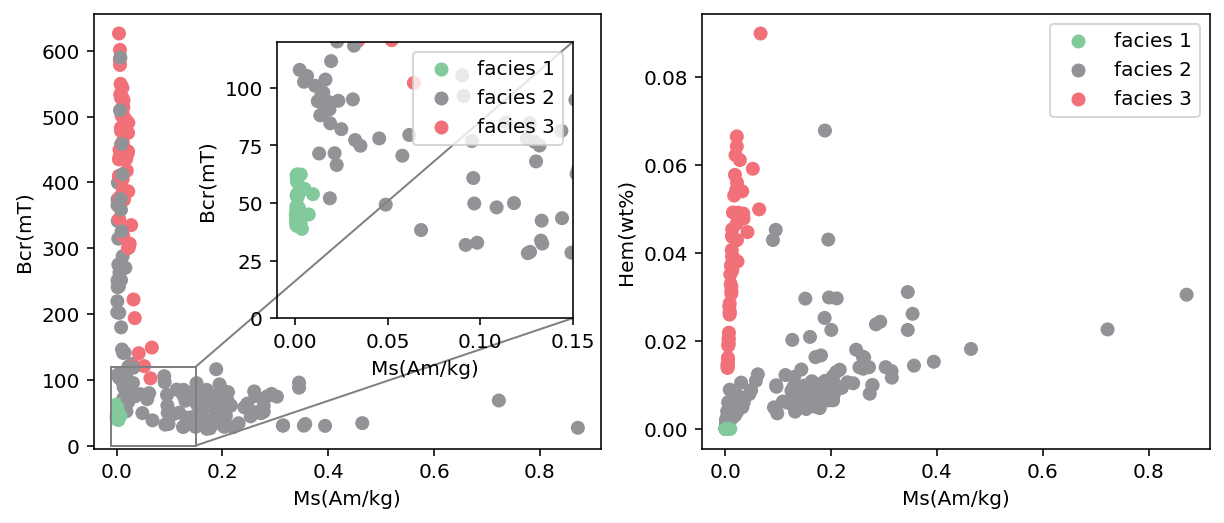

In [134]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
make_cross_plot(ax1,core_data,'Ms(Am/kg)','Bcr(mT)','color')
ax1.get_legend().remove()
axins = zoomed_inset_axes(ax1, 3.5, loc=1, borderpad=1.4)
make_cross_plot(axins,core_data,'Ms(Am/kg)','Bcr(mT)','color')
axins.set_xlim(-0.01, .15) # apply the x-limits
axins.set_ylim(-0.01, 120) # apply the y-limits
mark_inset(ax1, axins, loc1=1, loc2=4, fc="none", ec="0.5")

ax2 = plt.subplot(1,2,2)
make_cross_plot(ax2,core_data,'Ms(Am/kg)','Hem(wt%)','color')

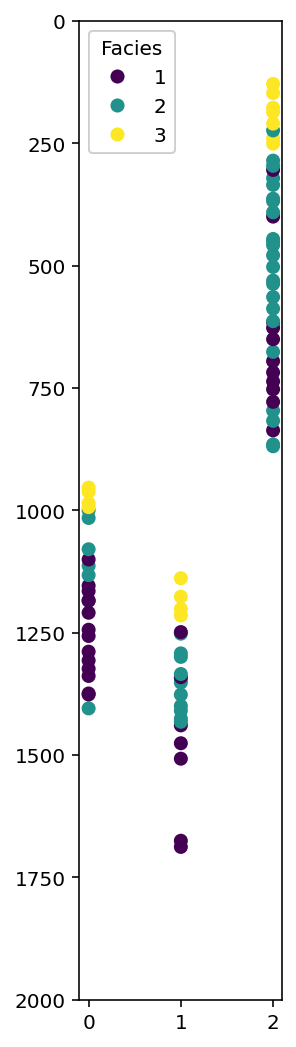

In [101]:
plt.figure(figsize=(4,9))
axis= plt.subplot(1,2,1)

scatter = axis.scatter(np.zeros(len(DO8_core_data)),DO8_core_data['Depth(ft)'],c=DO8_core_data['FaciesInterp'])
scatter = axis.scatter(np.ones(len(WC9_core_data)),WC9_core_data['Depth(ft)'],c=WC9_core_data['FaciesInterp'])
scatter = axis.scatter(np.ones(len(PC1_core_data))*2,PC1_core_data['Depth(ft)'],c=PC1_core_data['FaciesInterp'])


legend1 = axis.legend(*scatter.legend_elements(),
                    loc="upper left", title="Facies")
axis.add_artist(legend1)

plt.ylim(2000,0)
plt.show()

In [ ]:
PC1_core_data = PC1_core_data[(PC1_core_data['Bcr(mT)']<100) & (PC1_core_data['Mr(Am/kg)']<0.001)]
PC1_core_data

In [ ]:
plt.scatter(core_data['Fe-py(wt%)'],core_data['Ms(Am/kg)'],c=core_data['FaciesInterp'])
plt.xlabel('Fe-py(wt%)')
plt.ylabel('Ms(Am/kg)')

In [ ]:
plt.scatter(core_data['R'],core_data['Ms(Am/kg)'],c=core_data['FaciesInterp'])
plt.xlabel('R')
plt.ylabel('Ms(Am/kg)')

In [ ]:
plt.scatter(core_data['Comp1-EC.mean'],core_data['Comp2-EC.mean'],c=core_data['FaciesInterp'])
plt.xlabel('Comp1-EC.mean')
plt.ylabel('Comp2-EC.mean')

In [ ]:
plt.scatter(core_data['Ms(Am/kg)'],core_data['Bcr(mT)'],c=core_data['FaciesInterp'])
plt.xlabel('Ms(Am/kg)')
plt.ylabel('Bcr(mT)')

In [ ]:
#core_data_select = core_data[['Bcr(mT)','Ms(Am/kg)']]
#core_data_select = core_data[['Fe-py(wt%)','Hem(wt%)']]
core_data_select = core_data[['Ms(Am/kg)','Hem(wt%)']]

In [ ]:
core_array = core_data_select.to_numpy()

In [ ]:
core_array

In [ ]:
plt.scatter(core_array[:, 0], core_array[:, 1])

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(core_array)
y_kmeans = kmeans.predict(core_array)

In [ ]:
plt.scatter(core_array[:, 0], core_array[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);